<h1 align='center'>Method of Momentum</h1>

In [37]:
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

<h1>Gradient and Hessian of a Function</h1><a name='DefGradient'></a>

Let $D\subset\mathbb{R}^n$ be an open set, and $f\in\mathcal{C}^1(D, \mathbb{R}_{\geq0})$ be the _cost function_ 

Gradient descent is a way to minimize an objective function $f(x)$ parameterized by a model's parameters $x\in\mathbb{R}^n$ by updating the parameters in the opposite direction of the gradient of the objective function 
\begin{equation}
    \nabla f(x)=\left(\dfrac{\partial f_1}{\partial x_1}(x),\ldots,\dfrac{\partial f_n}{\partial x_n}(x)\right)
\end{equation}
w.r.t. the parameters. The learning rate $\eta$ determines the size of the steps we take to reach a (local) minimum. In other words, we follow the direction of the slope of the surface created by the objective function downhill until we reach a valley.

\begin{equation}
H(x)=\begin{bmatrix}
\dfrac{\partial^2f_1}{\partial x_1^2}&\dfrac{\partial^2f_1}{\partial x_1\partial x_2}&\cdots&\dfrac{\partial^2f_1}{\partial x_1\partial x_n}\\
\dfrac{\partial^2f_2}{\partial x_2\partial x_1}&\dfrac{\partial^2f_2}{\partial x_2^2}&\cdots&\dfrac{\partial^2f_2}{\partial x_2\partial x_n}\\
\vdots&\vdots&\ddots&\vdots\\
\dfrac{\partial^2f_n}{\partial x_n\partial x_1}&\dfrac{\partial^2f_1}{\partial x_n\partial x_2}&\cdots&\dfrac{\partial^2f_1}{\partial x_n^2}
\end{bmatrix}
\end{equation}

<h2>Geometric Representation<h2>

There is a nice way to describe the gradient geometrically. Consider the function
$$f(x,y)=4x^2+y^2.$$
The surface defined by this function is an elliptical paraboloid. This is a bowl-shaped surface. The bottom of the bowl lies at the origin. The figure below shows the level curves, defined by f(x,y)=c, of the surface. The level curves are the ellipses 4x^2+y^2=c.



The gradient vector <8x,2y> is plotted at the 3 points (sqrt(1.25),0), (1,1), (0,sqrt(5)). As the plot shows, the gradient vector at (x,y) is normal to the level curve through (x,y). As we will see below, the gradient vector points in the direction of greatest rate of increase of f(x,y)

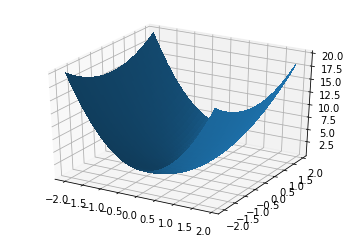

In [49]:
f = lambda x, y: 4*x**2+y**2
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
x, y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, f(x,y), linewidth=0, antialiased=False)

<h2> Gradient as a critical point

A point $x^\ast\in D$ is said to be a _critical point_ if
$$ \nabla f(x^\ast)=0$$
In addition it is said to be a _minimum_ (resp. _maximum_) if $H(x^\ast)<0$ (resp. $H(x^\ast)>0$).

**Theorem**: If $f$ is convex on $D$, then any local minimum is a global minimum.

Find a local minimum of the function $f(x)=x^4−3x^3+2$, with derivative $f'(x)=4x^3−9x^2$

0.000100001692772


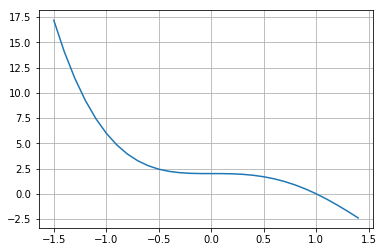

In [29]:
f = lambda x: x**4-3*x**3+2
x = np.arange(-1.5, 1.5, 0.1)
print optimize.newton(f, 0)
plt.plot(x, f(x))
plt.grid(True)

In [1]:
# From calculation, it is expected that the local minimum occurs at x=9/4

cur_x = 6 # The algorithm starts at x=6
gamma = 0.01 # step size multiplier
precision = 0.00001
previous_step_size = cur_x

df = lambda x: 4 * x**3 - 9 * x**2

while previous_step_size > precision:
    prev_x = cur_x
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)

print("The local minimum occurs at %f" % cur_x)

The local minimum occurs at 2.249965


<h1>References</h1><a name='References'></a>

1. http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentvariants
2. http://cs231n.github.io/optimization-1/
3. http://mat.gsia.cmu.edu/classes/QUANT/NOTES/chap3.pdf